**Analysis on effect of Covid on Stock market**

The Project was done by Maniratnam, Karthik Raja & Aravind Kumar.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

cc_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
d_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

cc_data = pd.read_csv(cc_url)
d_data = pd.read_csv(d_url)



In [3]:
cc_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
d_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [5]:
global_cc_df = cc_data.iloc[:, 4:].sum(axis=0)
global_d_df = d_data.iloc[:, 4:].sum(axis=0)

In [6]:
global_cc_df.head()

1/22/20     557
1/23/20     657
1/24/20     944
1/25/20    1437
1/26/20    2120
dtype: int64

In [7]:
global_d_df.head()

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
1/26/20    56
dtype: int64

In [8]:
global_df = pd.DataFrame({'Date': cc_data.columns[4:], 'Confirmed Cases': global_cc_df.values, 'Deaths': global_d_df.values})
#global_data['Date'] = global_data.index
global_df.head()

,Date,Confirmed Cases,Deaths
0,1/22/20,557,17
1,1/23/20,657,18
2,1/24/20,944,26
3,1/25/20,1437,42
4,1/26/20,2120,56


In [9]:
global_df['Date'] = pd.to_datetime(global_df['Date'], format='%m/%d/%y')

In [10]:
global_df.to_csv('global_df.csv', index=False)

In [11]:
apikey = 'RFAF0MZM1HV6SJ8G'
symbols = ['SPY', 'XIU.TO', 'DAL', 'VNQ', 'GLD']
interval = 'daily'
datatype = 'csv'


In [12]:
stocks_data = {}

for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={apikey}&datatype={datatype}&outputsize=full'
    response = requests.get(url)

    if response.status_code == 200:
        data_lines = response.content.decode('utf-8').split('\n')[1:-1]
        high_low_data = []
        for line in data_lines:
            row = line.split(',')
            date = row[0]
            if date >= '2019-01-01' and date <='2023-04-20': 
                high = float(row[2])
                low = float(row[3])
                high_low_data.append([date, high, low])
        stocks_data[symbol] = pd.DataFrame(high_low_data, columns=['Date', f'{symbol}_high', f'{symbol}_low'])

In [13]:
stocks_data

{'SPY':             Date  SPY_high   SPY_low
 0     2023-04-20    413.70  410.2700
 1     2023-04-19    415.08  412.1600
 2     2023-04-18    415.72  412.7802
 3     2023-04-17    413.96  411.0850
 4     2023-04-14    415.09  410.0600
 ...          ...       ...       ...
 1078  2019-01-08    257.31  254.0000
 1079  2019-01-07    255.95  251.6900
 1080  2019-01-04    253.11  247.1700
 1081  2019-01-03    248.57  243.6700
 1082  2019-01-02    251.21  245.9500
 
 [1083 rows x 3 columns],
 'XIU.TO':             Date  XIU.TO_high  XIU.TO_low
 0     2023-04-20        31.64       31.48
 1     2023-04-19        31.62       31.48
 2     2023-04-18        31.67       31.56
 3     2023-04-17        31.55       31.39
 4     2023-04-14        31.49       31.32
 ...          ...          ...         ...
 1075  2019-01-08        22.09       21.90
 1076  2019-01-07        21.87       21.67
 1077  2019-01-04        21.77       21.57
 1078  2019-01-03        21.58       21.34
 1079  2019-01-02        2

In [14]:
stocks_df = pd.concat(stocks_data.values(), axis=1)

In [15]:
stock_df = stocks_df[['Date', 'SPY_high', 'SPY_low', 'XIU.TO_high', 'XIU.TO_low', 'DAL_high', 'DAL_low', 'VNQ_high', 'VNQ_low', 'GLD_high', 'GLD_low']]



In [16]:
new_df = stock_df.iloc[:, 4:]

In [17]:
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [18]:
merged_df = pd.merge(global_df, new_df, on='Date',  how='outer')

In [19]:
# Append stock data to the global data frame
#for symbol, data in stock_data.items():
    #global_df = global_df.merge(data, on='Date', how='left')
merged_df

,Date,Confirmed Cases,Deaths,SPY_high,SPY_low,XIU.TO_high,XIU.TO_low,DAL_high,DAL_low,VNQ_high,VNQ_low,GLD_high,GLD_low
0,2020-01-22,557.0,17.0,332.95,331.17,26.39,26.27,60.72,59.56,96.15,94.82,146.81,146.3800
1,2020-01-23,657.0,18.0,332.17,329.41,26.47,26.34,60.38,58.19,95.82,94.69,147.62,146.6200
2,2020-01-24,944.0,26.0,332.53,327.36,26.43,26.35,60.21,57.84,96.04,95.16,148.38,146.8900
3,2020-01-25,1437.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2120.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,2019-01-08,NaN,NaN,257.31,254.00,21.58,21.34,48.67,46.95,76.79,75.33,121.71,121.0600
1433,2019-01-07,NaN,NaN,255.95,251.69,21.71,21.31,48.44,47.13,75.61,74.40,122.22,121.5731
1434,2019-01-04,NaN,NaN,253.11,247.17,NaN,NaN,48.83,46.24,75.02,73.30,121.60,120.6900
1435,2019-01-03,NaN,NaN,248.57,243.67,NaN,NaN,48.94,45.08,74.57,72.71,122.46,121.7300


In [20]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [21]:
#merged_df.to_csv('merged_data.csv', index=False)

In [22]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

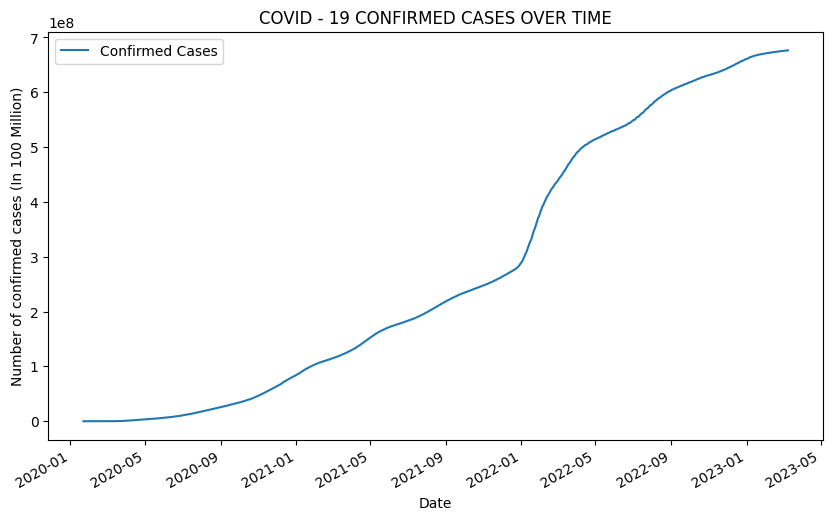

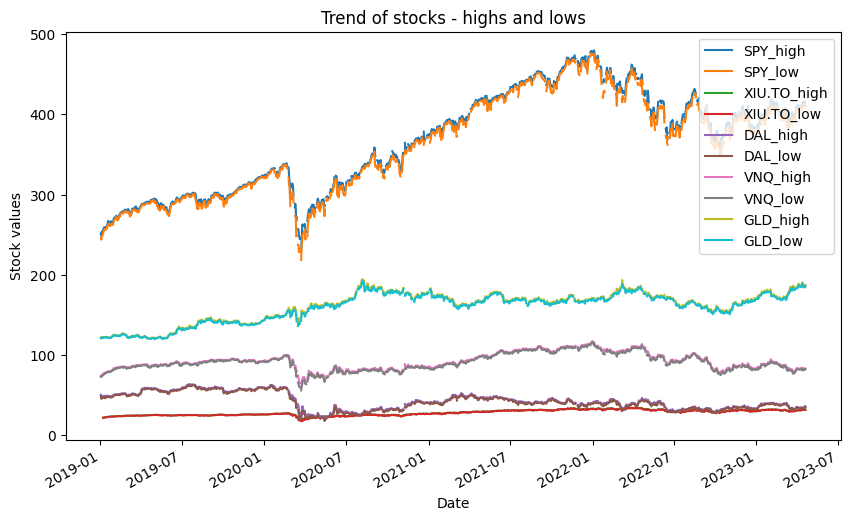

In [23]:
# graph
fig, ax = plt.subplots(figsize=(10, 6))
merged_df.plot(x='Date', y=['Confirmed Cases'], ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed cases (In 100 Million)')
ax.set_title('COVID - 19 CONFIRMED CASES OVER TIME')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
merged_df.plot(x='Date', y=[ 'SPY_high', 'SPY_low', 'XIU.TO_high', 'XIU.TO_low', 'DAL_high', 'DAL_low', 'VNQ_high', 'VNQ_low', 'GLD_high', 'GLD_low'], ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Stock values')
ax.set_title('Trend of stocks - highs and lows')
plt.show()


**SUMMARY**

Overall, the Stock market has not been affected too much due to covid and the number of confirmed cases especially in the latter part of the pandemic.

The stock market experienced a sharp dip in value acrosss all the industries considered. When confirmed no of cases began to increase during 2020-05 period, the stock marked saw a sharp dip but started to gradually recover from that point onwards.

Its safe to say that the stock market has handled the pandemic in a good way.